<a href="https://colab.research.google.com/github/fortunelagit/Image_Classification_on_Pet_Breed/blob/main/Pet_Breed_Classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pet Breed Classsification using CNN**

1. Mount dataset yang sudah dibagi menjadi folder berdasarkan classnya.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pastikan dataset untuk training terdiri dari 37 class.

In [13]:
import os

dir = '/content/drive/MyDrive/01_dataset_pet/pet_breed_dataset'

data_dir_list = os.listdir(dir)
print('Folders :', os.listdir(dir))
classes = sorted(os.listdir(dir+'/train'))
file_count = len(classes)
print(len(classes), 'class', classes)

Folders : ['train', 'final_test', '.ipynb_checkpoints']
37 class ['Abyssinian', 'American_Bulldog', 'American_Pitbull_Terrier', 'Basset_Hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer', 'British_Shorthair', 'Chihuahua', 'Egyptian_Mau', 'English_Cocker_Spaniel', 'English_Setter', 'German_Shorthaired', 'Great_Pyrenees', 'Havanese', 'Japanese_Chin', 'Keeshond', 'Leonberger', 'Maine_Coon', 'Miniature_Pinscher', 'Newfoundland', 'Persian', 'Pomeranian', 'Pug', 'Ragdoll', 'Russian_Blue', 'Saint_Bernard', 'Samoyed', 'Scottish_Terrier', 'Shiba_Inu', 'Siamese', 'Sphynx', 'Staffordshire_Bull_Terrier', 'Wheaten_Terrier', 'Yorkshire_Terrier']


2. Split dataset training menjadi 2 bagian untuk training dan validation.

In [15]:
train_dataset_dir = '/content/drive/MyDrive/01_dataset_pet/pet_breed_dataset/train/'
base_dir = '/content/dataset/'
os.mkdir(base_dir)

In [16]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

for i in classes:
  train_class_dir = os.path.join(train_dir, i)
  os.mkdir(train_class_dir)

  valid_class_dir = os.path.join(validation_dir, i)
  os.mkdir(valid_class_dir)

  #test_class_dir = os.path.join(test_dir, i)
  #os.mkdir(test_class_dir)

In [17]:
print(classes)

['Abyssinian', 'American_Bulldog', 'American_Pitbull_Terrier', 'Basset_Hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer', 'British_Shorthair', 'Chihuahua', 'Egyptian_Mau', 'English_Cocker_Spaniel', 'English_Setter', 'German_Shorthaired', 'Great_Pyrenees', 'Havanese', 'Japanese_Chin', 'Keeshond', 'Leonberger', 'Maine_Coon', 'Miniature_Pinscher', 'Newfoundland', 'Persian', 'Pomeranian', 'Pug', 'Ragdoll', 'Russian_Blue', 'Saint_Bernard', 'Samoyed', 'Scottish_Terrier', 'Shiba_Inu', 'Siamese', 'Sphynx', 'Staffordshire_Bull_Terrier', 'Wheaten_Terrier', 'Yorkshire_Terrier']


In [37]:
import csv

with open(base_dir + 'test_set.csv', 'w') as outfile:
  csv_writer = csv.writer(outfile)
  line = ['filename','class']
  csv_writer.writerow(line)

In [35]:
import random
import shutil

def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE, CLASS_INDEX):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            #print(filename)
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    valid_size = 0.85
    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int((len(files) - training_length)*valid_size)
    test_length = int((len(files) - training_length)*(1-valid_size))

    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:training_length+valid_length]
    test_set = shuffled_set[training_length+valid_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        shutil.copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        shutil.copyfile(this_file, destination)
    
    for filename in test_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        shutil.copyfile(this_file, destination)
        with open(base_dir + 'test_set.csv', 'a') as outfile:
          csv_writer = csv.writer(outfile)
          line = [filename,CLASS_INDEX]
          csv_writer.writerow(line)

In [38]:
split_size = .8

source_dir = train_dataset_dir
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

classes_index = 0

for i in classes:
  class_source_dir = os.path.join(source_dir, i)
  #print(class_source_dir)
  class_train_dir = os.path.join(train_dir, i)
  class_valid_dir = os.path.join(valid_dir, i)
  #class_test_dir = os.path.join(test_dir, i)

  #print(class_train_dir)
  split_data(class_source_dir + '/', class_train_dir + '/', class_valid_dir + '/', test_dir + '/', split_size, f'{classes_index}')
  classes_index += 1

Distribusi dataset untuk Training:

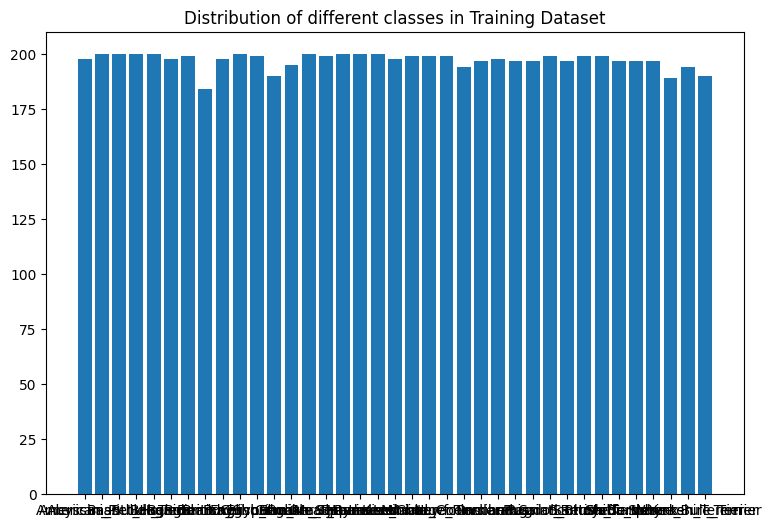

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

nimgs = {}
for i in classes:
    nimages = len(os.listdir(train_dir + '/' + i + '/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [40]:
for i in classes:
    print('Training {} images are: '.format(i)+str(len(os.listdir(train_dir + '/' + i + '/'))))

Training Abyssinian images are: 198
Training American_Bulldog images are: 200
Training American_Pitbull_Terrier images are: 200
Training Basset_Hound images are: 200
Training Beagle images are: 200
Training Bengal images are: 198
Training Birman images are: 199
Training Bombay images are: 184
Training Boxer images are: 198
Training British_Shorthair images are: 200
Training Chihuahua images are: 199
Training Egyptian_Mau images are: 190
Training English_Cocker_Spaniel images are: 195
Training English_Setter images are: 200
Training German_Shorthaired images are: 199
Training Great_Pyrenees images are: 200
Training Havanese images are: 200
Training Japanese_Chin images are: 200
Training Keeshond images are: 198
Training Leonberger images are: 199
Training Maine_Coon images are: 199
Training Miniature_Pinscher images are: 199
Training Newfoundland images are: 194
Training Persian images are: 197
Training Pomeranian images are: 198
Training Pug images are: 197
Training Ragdoll images are:

Distibrusi dataset untuk validasi:

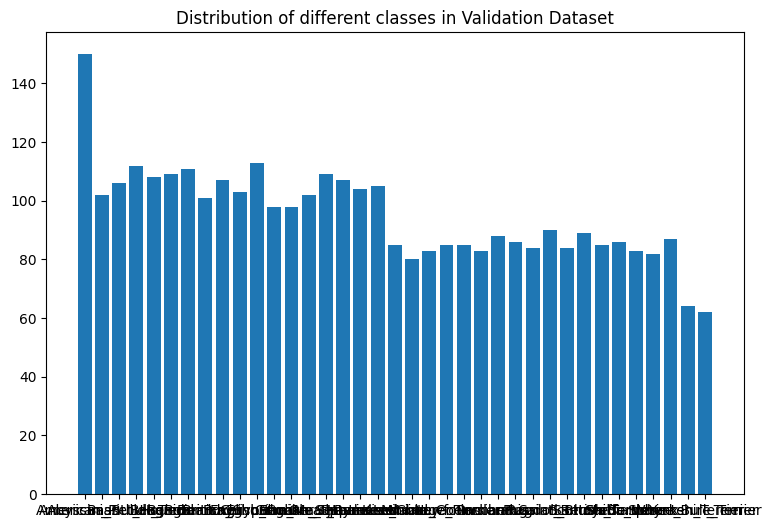

In [41]:
nimgs = {}
for i in classes:
    nimages = len(os.listdir(valid_dir + '/' + i + '/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

3. Pembuatan Model CNN

In [42]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Ukuran width dan height yang kecil akan mempersingkat waktu training.

In [43]:
img_width=300; img_height=300
batch_size=32

In [44]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 7296 images belonging to 37 classes.


In [45]:
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(valid_dir,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 3516 images belonging to 37 classes.


Simpan model terbaik yang dihasilkan.

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(37, activation='softmax')
])
model.summary()

4. Compile Model

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

5. Training Model

Fungsi reduce learning rate ditambahkan untuk mitigasi nilai akurasi yang terus turun, yang kemungkinan disebabkan oleh learning rate yang terlalu tinggi.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [ ]:
history = model.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model, reduce_lr]
                              )

In [ ]:
model.save('/content/drive/MyDrive/01_dataset_pet/pet_breed_dataset/')

6. Hasil Training

Grafik hasil training dan validasi berdasarkan akurasi:

Terdapat sedikit perbedaan pada grafik training(tertinggi sekitar 0.4)dan validation (tertinggi sekitar 0.7), namun sepertinya tidak begitu jauh untuk dinilai overfitting.

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Grafik training dan validasi berdasarkan loss:

Hasil mirip dengan grafik akurasi.

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

7. Testing Model

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
test_images_dir = os.path.join(base_dir, 'test/')

index = 0

for i in classes:

  with open(base_dir + 'data_test.csv', 'wb') as outfile:
    

In [ ]:
test_images_dir = os.path.join(base_dir, 'test/')
test_df = pd.read_csv(base_dir + 'test_set.csv')

test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir + item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
#print(answer)
#print(answer[20])

In [ ]:
test_df = pd.read_csv('/content/dataset/final_test.csv')
y_true = test_df['breed']
y_pred = array
#print(y_true[20])
#for i in y_true:
#  print(y_true[i] + y_pred[i])

In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

Pembuatan confusion matrix untuk menganalisa prediksi label yang salah.

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
    else:
        cm=cm


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
     


Hasil confusion matrix cukup bagus. Bila dilihat kebanyakan data berada di garis diagonal yang berarti hasil prediksi sesuai dengan label sebenarnya.

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(37,14))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()
     